In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
# constants
NUM_ACTIONS = 10
NUM_GAMES = 2000
NUM_TRIALS_PER_GAME = 1000
NUM_SAMPLES_PLOTTING = 1000 # for plotting purposes

In [3]:
# sample a list of means q*(a) for each action
def sample_means():
    mu, sigma = 0, 1
    return np.random.normal(mu, sigma, NUM_ACTIONS)

# def sample_distributions(sample_means):
#     return list(map(lambda mu: np.random.normal(mu, 1, NUM_SAMPLES_PLOTTING), sample_means))
    
    
means = sample_means()
# sample_distributions = sample_distributions(sample_means)

print("Sample means: ", means)
# print("First sample distribution: ", sample_distributions[0])

Sample means:  [ 0.19062721  1.98534323 -1.82734026 -0.8409136   0.15192785  0.65331982
 -0.27618688  0.73483483 -0.0086199  -0.99763492]


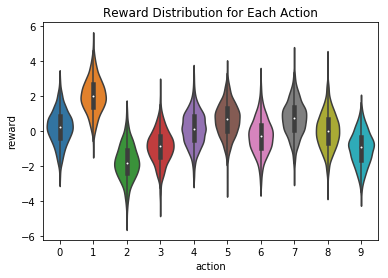

In [4]:
# illustrate each action's distribution
# ax = sns.distplot(sample_means).set_title("moo")

rows = []
for action in range(NUM_ACTIONS):
    for sample in range(NUM_SAMPLES_PLOTTING):
        row = [action, np.random.normal(means[action], 1)]
        rows.append(row)

df = pd.DataFrame(data=rows, columns=['action', 'reward'])


ax = sns.violinplot(x="action", y="reward", data=df).set_title("Reward Distribution for Each Action")

In [5]:
# create separate games (sample means)
games = []
for i in range(NUM_GAMES):
    games.append(sample_means())
    
games[0]

array([-0.9704709 , -1.82211034, -0.07290663, -0.74535015,  0.3104822 ,
       -0.11159133,  0.73058171, -0.9577761 , -0.5648926 ,  0.71201484])

In [12]:
# now define an RL agent that is greedy (1-e) of the time
class Agent:
    def __init__(self, e=0, step_size=0):
        self.e = e
        self.step_size = step_size
        self.time_step = 1
        self.action_mean_estimates = np.zeros(NUM_ACTIONS)

    def choose_action(self, sample_means):
        #if self.time_step == 1:
        #    self.action_mean_estimates = sample_means
        
        # take action with greatest reward
        action_index = np.argmax(self.action_mean_estimates)
        
        # with prob e choose a random one instead
        if self.e != 0 and np.random.uniform() < self.e:
            action_index = np.random.randint(0, high=NUM_ACTIONS)
            
        # sample reward from chosen action
        action_reward = np.random.normal(sample_means[action_index])        
        
        if self.step_size == 0:
            step_size = 1 / self.time_step
        else:
            step_size = self.step_size
        
        # update that action's reward estimate and sum from incremental update
        temp = self.action_mean_estimates[action_index]
        self.action_mean_estimates[action_index] = temp + step_size * (action_reward - temp)
    
        # update time step
        self.time_step = self.time_step + 1
        
        # return the reward obtained
        return action_reward
    

In [15]:
# try all games for increasing trials, to plot performance
results = { "greedy": [], "greedy_1": [], "greedy_2": [] } # one per num of trials
for time_step in range(500): #NUM_TRIALS_PER_GAME):
    
    # new agent per game
    greedy = Agent()
    greedy_1 = Agent(e=0.2)
    #greedy_2 = Agent(e=0.01)
    
    rewards = []
    rewards_1 = []
    #rewards_2 = []
    
    for game in range(NUM_GAMES):
        rewards.append(greedy.choose_action(games[game]))
        rewards_1.append(greedy_1.choose_action(games[game]))
        #rewards_2.append(greedy_2.choose_action(games[game]))
        
        
    results["greedy"].append(np.mean(rewards))
    results["greedy_1"].append(np.mean(rewards_1))
    #results["greedy_2"].append(np.mean(rewards_2))

/home/misrab/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


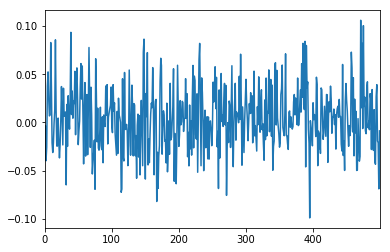

In [17]:
# ax = sns.tsplot(data=results["greedy"])
ax = sns.tsplot(data=results["greedy_1"])

